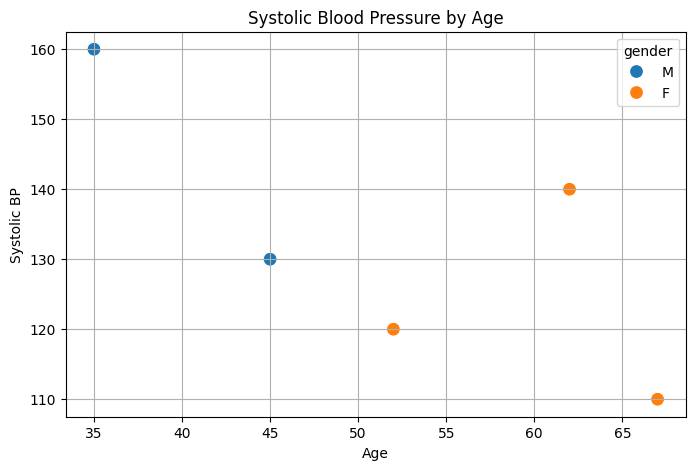

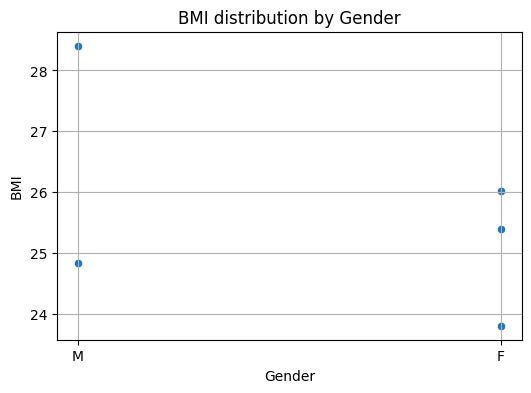

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

patients = pd.read_csv("/Users/eueanastasiou/Documents/GitHub/clinical-data-dashboard/data/patients.csv", delimiter=';')
vitals = pd.read_csv("/Users/eueanastasiou/Documents/GitHub/clinical-data-dashboard/data/vitals.csv", delimiter=';')

df = pd.merge(vitals, patients, on = 'patient_id')

df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

df['high_bp'] = (df['systolic_bp'] > 140) | (df['diastolic_bp'] > 90)

df.head()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='systolic_bp', hue='gender', s=100)
plt.title("Systolic Blood Pressure by Age")
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='gender', y='bmi')
plt.title("BMI distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.grid(True)
plt.show()